In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine learning/final project

/content/drive/MyDrive/Colab Notebooks/Machine learning/final project


In [3]:
# https://pythonprogramming.medium.com/pandas-read-excel-removed-support-for-xlsx-files-426e4acfde89#:~:text=Pandas%20uses%20the%20xlrd%20as,a%20xlsx%20excel%20using%20pandas.
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd 
df = pd.read_excel('modified.xlsx', engine = 'openpyxl')
df.head()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
0,male,White,60 - 69,193.040,115.7,NaN,0.0,0.0,2.5,49.0,2.60,*1/*1,A/G
1,female,White,50 - 59,176.530,144.2,NaN,0.0,0.0,2.5,42.0,2.15,*1/*1,A/A
2,female,White,40 - 49,162.560,77.1,NaN,0.0,0.0,2.5,53.0,1.90,*1/*1,G/G
3,male,White,60 - 69,182.245,90.7,NaN,0.0,0.0,2.5,28.0,2.40,*1/*1,A/G
4,male,White,50 - 59,167.640,72.6,NaN,0.0,0.0,2.5,42.0,1.90,*1/*3,A/G


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5696 non-null   object 
 1   Race (Reported)                                                    5194 non-null   object 
 2   Age                                                                5658 non-null   object 
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           3283 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  



---


**Data Preprocessing**


---



**First I remove the row which TARGET is NA, Total 5700 after dropna become 5528**

In [6]:
df_clean = df.dropna(subset=["Therapeutic Dose of Warfarin"])

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5524 non-null   object 
 1   Race (Reported)                                                    5022 non-null   object 
 2   Age                                                                5489 non-null   object 
 3   Height (cm)                                                        4447 non-null   float64
 4   Weight (kg)                                                        5256 non-null   float64
 5   Diabetes                                                           3126 non-null   float64
 6   Simvastatin (Zocor)                                                3753 non-null   float64
 7   Amiodarone (Cordarone)  

**For gender we have 4 missing value I want to replact it with male**

In [8]:
df_clean["Gender"].value_counts()

male      3220
female    2304
Name: Gender, dtype: int64

In [9]:
df_clean["Gender"] = df_clean["Gender"].fillna("male")

<ipython-input-9-a55d74b80f32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Gender"] = df_clean["Gender"].fillna("male")


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5528 non-null   object 
 1   Race (Reported)                                                    5022 non-null   object 
 2   Age                                                                5489 non-null   object 
 3   Height (cm)                                                        4447 non-null   float64
 4   Weight (kg)                                                        5256 non-null   float64
 5   Diabetes                                                           3126 non-null   float64
 6   Simvastatin (Zocor)                                                3753 non-null   float64
 7   Amiodarone (Cordarone)  

**For Race can see biggest group is white so  I will replace na to white**

In [11]:
df_clean["Race (Reported)"].value_counts()

White                        2135
Japanese                      828
Caucasian                     662
Korean                        263
Han Chinese                   250
Black                         244
Black or African American     231
Chinese                       142
Malay                          82
Intermediate                   64
Indian                         36
African-American               23
Asian                          18
Other Mixed Race               18
Hispanic                       13
Other                          10
other                           1
Other (Black British)           1
Black African                   1
Name: Race (Reported), dtype: int64

In [12]:
df_clean["Race (Reported)"] = df_clean["Race (Reported)"].fillna("White")

<ipython-input-12-7d3b3c5f2394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Race (Reported)"] = df_clean["Race (Reported)"].fillna("White")


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5528 non-null   object 
 1   Race (Reported)                                                    5528 non-null   object 
 2   Age                                                                5489 non-null   object 
 3   Height (cm)                                                        4447 non-null   float64
 4   Weight (kg)                                                        5256 non-null   float64
 5   Diabetes                                                           3126 non-null   float64
 6   Simvastatin (Zocor)                                                3753 non-null   float64
 7   Amiodarone (Cordarone)  

**For age can see there are not much na value so i will just drop the row with na age**

In [14]:
df_clean = df_clean.dropna(subset=["Age"])

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5489 non-null   object 
 1   Race (Reported)                                                    5489 non-null   object 
 2   Age                                                                5489 non-null   object 
 3   Height (cm)                                                        4416 non-null   float64
 4   Weight (kg)                                                        5222 non-null   float64
 5   Diabetes                                                           3126 non-null   float64
 6   Simvastatin (Zocor)                                                3753 non-null   float64
 7   Amiodarone (Cordarone)  

**For height and weight give avg. for na value**

In [16]:
import numpy as np
df_clean["Height (cm)"] = df_clean["Height (cm)"].replace(np.NaN, df_clean["Height (cm)"].mean())

In [17]:
df_clean["Weight (kg)"] = df_clean["Weight (kg)"].replace(np.NaN, df_clean["Weight (kg)"].mean())

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5489 non-null   object 
 1   Race (Reported)                                                    5489 non-null   object 
 2   Age                                                                5489 non-null   object 
 3   Height (cm)                                                        5489 non-null   float64
 4   Weight (kg)                                                        5489 non-null   float64
 5   Diabetes                                                           3126 non-null   float64
 6   Simvastatin (Zocor)                                                3753 non-null   float64
 7   Amiodarone (Cordarone)  

**For Diabetes/Simvastatin/Amiodarone/Target INR treat NA as 0 --> not present**

In [19]:
df_clean["Diabetes"] = df_clean["Diabetes"].fillna(0)

In [20]:
df_clean["Simvastatin (Zocor)"] = df_clean["Simvastatin (Zocor)"].fillna(0)

In [21]:
df_clean["Amiodarone (Cordarone)"] = df_clean["Amiodarone (Cordarone)"].fillna(0)

In [22]:
df_clean["Target INR"] = df_clean["Target INR"].fillna(0)

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5489 non-null   object 
 1   Race (Reported)                                                    5489 non-null   object 
 2   Age                                                                5489 non-null   object 
 3   Height (cm)                                                        5489 non-null   float64
 4   Weight (kg)                                                        5489 non-null   float64
 5   Diabetes                                                           5489 non-null   float64
 6   Simvastatin (Zocor)                                                5489 non-null   float64
 7   Amiodarone (Cordarone)  

**For INR on Reported Therapeutic Dose of Warfarin give avg. for na value**

In [24]:
df_clean["INR on Reported Therapeutic Dose of Warfarin"] = df_clean["INR on Reported Therapeutic Dose of Warfarin"].replace(np.NaN, df_clean["INR on Reported Therapeutic Dose of Warfarin"].mean())

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5489 non-null   object 
 1   Race (Reported)                                                    5489 non-null   object 
 2   Age                                                                5489 non-null   object 
 3   Height (cm)                                                        5489 non-null   float64
 4   Weight (kg)                                                        5489 non-null   float64
 5   Diabetes                                                           5489 non-null   float64
 6   Simvastatin (Zocor)                                                5489 non-null   float64
 7   Amiodarone (Cordarone)  

**For Cyp2C9 genotypes and VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T: I don't know how this will affect the model, and dont know how to replace the na value, so I will drop all the final df_clean contain 3820 row**

In [26]:
df_clean = df_clean.dropna(subset=["Cyp2C9 genotypes"])

In [27]:
df_clean = df_clean.dropna(subset=["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"])

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 5410
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             3820 non-null   object 
 1   Race (Reported)                                                    3820 non-null   object 
 2   Age                                                                3820 non-null   object 
 3   Height (cm)                                                        3820 non-null   float64
 4   Weight (kg)                                                        3820 non-null   float64
 5   Diabetes                                                           3820 non-null   float64
 6   Simvastatin (Zocor)                                                3820 non-null   float64
 7   Amiodarone (Cordarone)  

In [29]:
df_clean.head()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
0,male,White,60 - 69,193.040,115.7,0.0,0.0,0.0,2.5,49.0,2.60,*1/*1,A/G
1,female,White,50 - 59,176.530,144.2,0.0,0.0,0.0,2.5,42.0,2.15,*1/*1,A/A
2,female,White,40 - 49,162.560,77.1,0.0,0.0,0.0,2.5,53.0,1.90,*1/*1,G/G
3,male,White,60 - 69,182.245,90.7,0.0,0.0,0.0,2.5,28.0,2.40,*1/*1,A/G
4,male,White,50 - 59,167.640,72.6,0.0,0.0,0.0,2.5,42.0,1.90,*1/*3,A/G


**After NA value trimming, apply catagorical features transformation**

---



In [30]:
df_clean["Gender"].value_counts()

male      2279
female    1541
Name: Gender, dtype: int64

In [31]:
df_clean["Race (Reported)"].value_counts()

White                        1565
Japanese                      789
Caucasian                     538
Korean                        253
Han Chinese                   235
Black                         183
Black or African American     117
Intermediate                   64
African-American               23
Other Mixed Race               18
Asian                          17
Hispanic                       11
Other                           4
other                           1
Other (Black British)           1
Black African                   1
Name: Race (Reported), dtype: int64

In [32]:
df_clean["Age"].value_counts()

70 - 79    1078
60 - 69     931
50 - 59     777
80 - 89     395
40 - 49     351
30 - 39     163
20 - 29      93
90+          19
10 - 19      13
Name: Age, dtype: int64

In [33]:
df_clean["Cyp2C9 genotypes"].value_counts()

*1/*1     2907
*1/*2      485
*1/*3      321
*2/*3       45
*2/*2       40
*3/*3       12
*1/*5        4
*1/*11       2
*1/*6        2
*1/*13       1
*1/*14       1
Name: Cyp2C9 genotypes, dtype: int64

In [34]:
df_clean["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"].value_counts()

A/A    1405
A/G    1336
G/G    1079
Name: VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T, dtype: int64

https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [35]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_clean['Gender']= label_encoder.fit_transform(df_clean['Gender'])
df_clean['Race (Reported)']= label_encoder.fit_transform(df_clean['Race (Reported)'])
df_clean['Age']= label_encoder.fit_transform(df_clean['Age'])
df_clean['Cyp2C9 genotypes']= label_encoder.fit_transform(df_clean['Cyp2C9 genotypes'])
df_clean['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']= label_encoder.fit_transform(df_clean['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'])

In [36]:
df_clean["Gender"].value_counts()

1    2279
0    1541
Name: Gender, dtype: int64

In [37]:
df_clean["Race (Reported)"].value_counts()

14    1565
9      789
5      538
10     253
6      235
2      183
4      117
8       64
0       23
13      18
1       17
7       11
11       4
15       1
12       1
3        1
Name: Race (Reported), dtype: int64

In [38]:
df_clean["Age"].value_counts()

6    1078
5     931
4     777
7     395
3     351
2     163
1      93
8      19
0      13
Name: Age, dtype: int64

In [39]:
df_clean["Cyp2C9 genotypes"].value_counts()

0     2907
4      485
5      321
9       45
8       40
10      12
6        4
1        2
7        2
2        1
3        1
Name: Cyp2C9 genotypes, dtype: int64

In [40]:
df_clean["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"].value_counts()

0    1405
1    1336
2    1079
Name: VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T, dtype: int64

In [41]:
df_clean.head()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
0,1,14,5,193.040,115.7,0.0,0.0,0.0,2.5,49.0,2.60,0,1
1,0,14,4,176.530,144.2,0.0,0.0,0.0,2.5,42.0,2.15,0,0
2,0,14,3,162.560,77.1,0.0,0.0,0.0,2.5,53.0,1.90,0,2
3,1,14,5,182.245,90.7,0.0,0.0,0.0,2.5,28.0,2.40,0,1
4,1,14,4,167.640,72.6,0.0,0.0,0.0,2.5,42.0,1.90,5,1


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 5410
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             3820 non-null   int64  
 1   Race (Reported)                                                    3820 non-null   int64  
 2   Age                                                                3820 non-null   int64  
 3   Height (cm)                                                        3820 non-null   float64
 4   Weight (kg)                                                        3820 non-null   float64
 5   Diabetes                                                           3820 non-null   float64
 6   Simvastatin (Zocor)                                                3820 non-null   float64
 7   Amiodarone (Cordarone)  

In [43]:
df_clean = df_clean.astype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2720c5e820>,
      dtype=object)

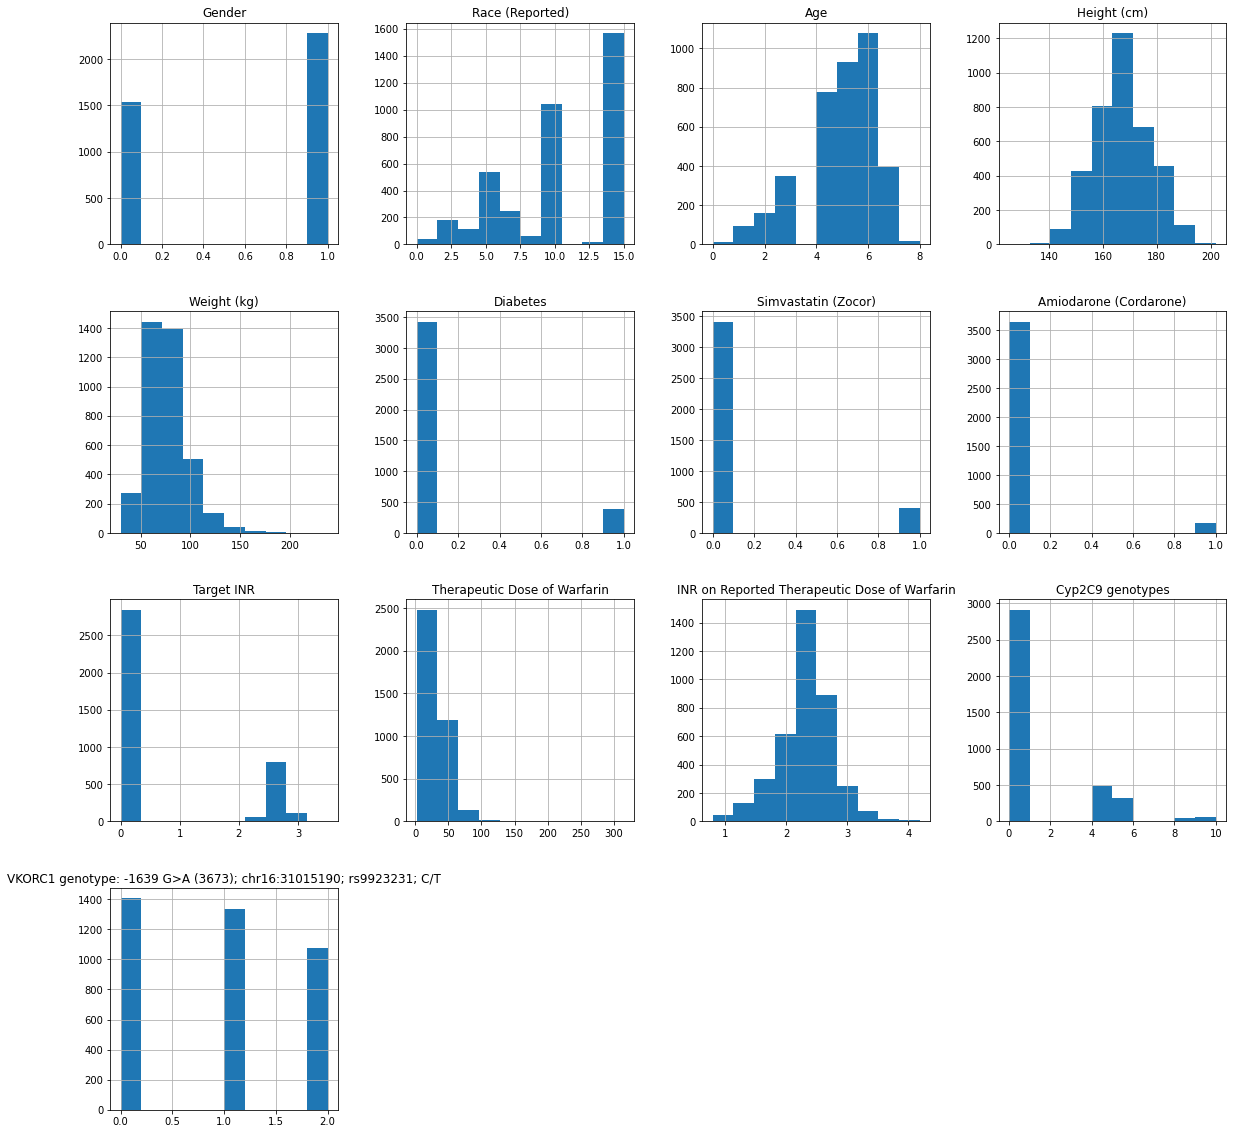

In [44]:
df_clean.hist(figsize=(20,20))

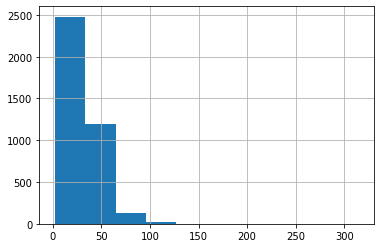

In [45]:
df_clean["Therapeutic Dose of Warfarin"].hist()

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 5410
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             3820 non-null   float64
 1   Race (Reported)                                                    3820 non-null   float64
 2   Age                                                                3820 non-null   float64
 3   Height (cm)                                                        3820 non-null   float64
 4   Weight (kg)                                                        3820 non-null   float64
 5   Diabetes                                                           3820 non-null   float64
 6   Simvastatin (Zocor)                                                3820 non-null   float64
 7   Amiodarone (Cordarone)  

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_clean,test_size=0.3, random_state=42)

In [48]:
X_train

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
1386,1.0,9.0,6.0,164.084000,66.500000,0.0,0.0,0.0,0.0,21.00,2.14,0.0,0.0
1042,1.0,9.0,4.0,166.878000,60.000000,0.0,0.0,0.0,0.0,26.25,1.57,0.0,0.0
702,0.0,9.0,7.0,144.018000,46.000000,0.0,0.0,0.0,0.0,10.50,2.23,0.0,0.0
4105,0.0,5.0,7.0,168.106202,67.000000,0.0,0.0,0.0,0.0,26.25,2.81,0.0,2.0
3734,0.0,14.0,6.0,168.106202,77.940062,0.0,0.0,0.0,0.0,24.50,2.50,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1.0,9.0,6.0,162.052000,63.000000,0.0,0.0,0.0,0.0,17.50,2.33,0.0,0.0
1497,1.0,6.0,0.0,181.000400,112.000000,0.0,0.0,0.0,0.0,42.00,1.70,0.0,1.0
1043,1.0,9.0,5.0,166.878000,70.000000,0.0,0.0,0.0,0.0,21.00,1.49,0.0,0.0
4612,0.0,8.0,4.0,149.098000,60.000000,0.0,0.0,0.0,0.0,32.50,2.60,5.0,1.0


In [49]:
y_train_label = X_train["Therapeutic Dose of Warfarin"]
X_train_feature = X_train.drop("Therapeutic Dose of Warfarin",axis=1)

In [55]:
X_train_feature.to_csv('X_train_feature', index=False)

In [ ]:
y_train_label

1386    21.00
1042    26.25
702     10.50
4105    26.25
3734    24.50
        ...  
1323    17.50
1497    42.00
1043    21.00
4612    32.50
4175    17.50
Name: Therapeutic Dose of Warfarin, Length: 2674, dtype: float64

In [ ]:
# convert multi-class labels into binary class
y_train_label_30 = (y_train_label <= 30)

In [ ]:
y_train_label_30

1386     True
1042     True
702      True
4105     True
3734     True
        ...  
1323     True
1497    False
1043     True
4612    False
4175     True
Name: Therapeutic Dose of Warfarin, Length: 2674, dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f7949a370>,
      dtype=object)

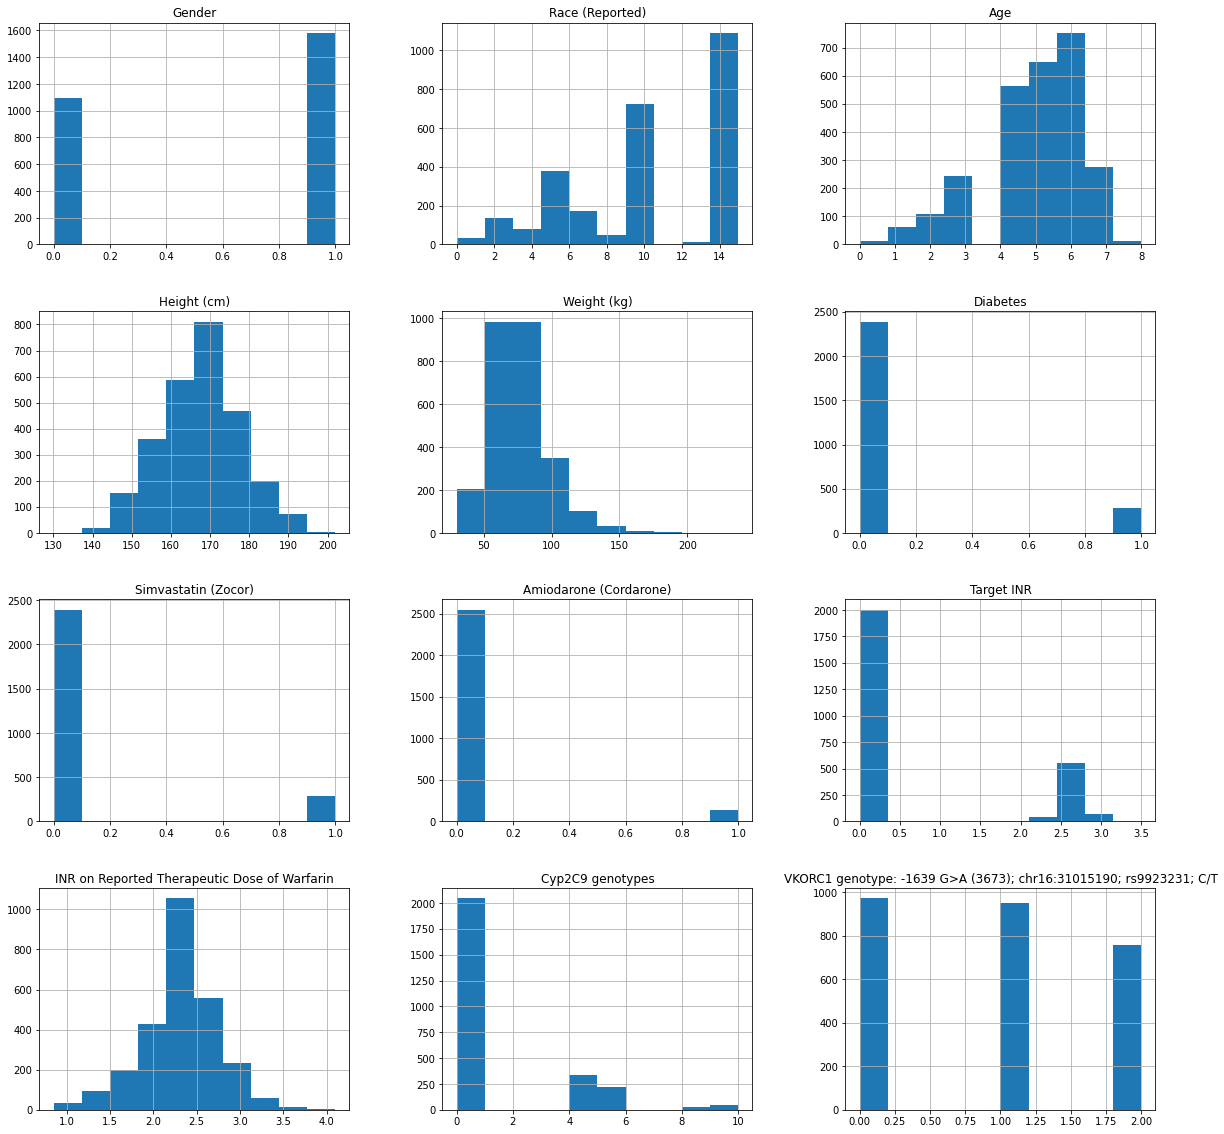

In [ ]:
X_train_feature.hist(figsize=(20,20))

In [ ]:
X_test

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
3529,0.0,5.0,3.0,156.0000,71.0,0.0,1.0,0.0,0.0,65.00,3.02,0.0,2.0
1633,1.0,6.0,4.0,181.9910,80.0,0.0,0.0,0.0,0.0,30.03,1.94,0.0,0.0
2846,0.0,10.0,3.0,156.0000,51.0,1.0,0.0,0.0,0.0,28.00,2.77,0.0,0.0
4601,0.0,14.0,4.0,150.1140,70.0,0.0,0.0,0.0,0.0,22.50,2.30,0.0,0.0
4044,1.0,4.0,3.0,182.8800,125.0,0.0,0.0,0.0,0.0,52.50,2.50,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.0,14.0,7.0,185.4200,76.7,0.0,0.0,0.0,2.5,21.00,2.90,0.0,1.0
1956,1.0,14.0,5.0,178.5620,81.4,1.0,0.0,0.0,2.5,27.50,2.23,4.0,1.0
1401,0.0,9.0,5.0,150.8760,56.5,0.0,0.0,0.0,0.0,28.00,2.03,0.0,0.0
1491,1.0,6.0,5.0,175.9966,74.3,0.0,0.0,0.0,0.0,17.50,2.60,0.0,0.0


In [ ]:
y_test_label = X_test["Therapeutic Dose of Warfarin"]
X_test_feature = X_test.drop("Therapeutic Dose of Warfarin",axis=1)

In [ ]:
y_test_label

3529    65.00
1633    30.03
2846    28.00
4601    22.50
4044    52.50
        ...  
282     21.00
1956    27.50
1401    28.00
1491    17.50
5017    28.00
Name: Therapeutic Dose of Warfarin, Length: 1146, dtype: float64

In [ ]:
# convert multi-class labels into binary class
y_test_label_30 = (y_test_label <= 30)

In [ ]:
y_test_label_30

3529    False
1633    False
2846     True
4601     True
4044    False
        ...  
282      True
1956     True
1401     True
1491     True
5017     True
Name: Therapeutic Dose of Warfarin, Length: 1146, dtype: bool

**Standardization**

---



In [ ]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
X_train_feature_scale = standardscaler.fit_transform(X_train_feature)
X_test_feature_scale = standardscaler.transform(X_test_feature)

**KNN**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train_feature_scale, y_train_label_30)
y_test_label_pred = KNN_classifier.predict(X_test_feature_scale)


In [ ]:
from sklearn import metrics
print("KNN_Accuracy: ", metrics.accuracy_score(y_test_label_30, y_test_label_pred))

KNN_Accuracy:  0.7617801047120419


In [ ]:
n_neighbors_list = [3, 5, 7,9,11]

from scipy.spatial import distance
metrics_list = [distance.euclidean, distance.minkowski, distance.cosine]


KNN_para = {
'n_neighbors': n_neighbors_list,
'metric': metrics_list
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

KNN_rand_search = RandomizedSearchCV(estimator = KNN_classifier, param_distributions = KNN_para, n_iter = 10, cv = 5, scoring = 'accuracy', return_train_score = True)

KNN_rand_search.fit(X_train_feature_scale, y_train_label_30)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   param_distributions={'metric': [<function euclidean at 0x7f5a216d70d0>,
                                                   <function minkowski at 0x7f5a216d2f70>,
                                                   <function cosine at 0x7f5a216d7280>],
                                        'n_neighbors': [3, 5, 7, 9, 11]},
                   return_train_score=True, scoring='accuracy')

In [ ]:
KNN_rand_search.best_params_

{'n_neighbors': 11,
 'metric': <function scipy.spatial.distance.cosine(u, v, w=None)>}

In [ ]:
#n_neighbors=11,metric= "cosine"
new_KNN_classifier = KNeighborsClassifier(n_neighbors=11, metric = "cosine")
new_KNN_classifier.fit(X_train_feature_scale, y_train_label_30)


KNeighborsClassifier(metric='cosine', n_neighbors=11)

In [ ]:
import pickle
filename = 'KNN_model.sav'
pickle.dump(new_KNN_classifier, open(filename, 'wb'))


In [ ]:
import pickle
filename = 'KNN_model.sav'
KNN_model_load = pickle.load(open(filename, 'rb'))

In [ ]:
y_test_label_pred_KNN = KNN_model_load.predict(X_test_feature_scale)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
print("KNN_Accuracy: ", accuracy_score(y_test_label_30, y_test_label_pred_KNN))
print("KNN_precision: ", precision_score(y_test_label_30, y_test_label_pred_KNN))
print("KNN_recall: ", recall_score(y_test_label_30, y_test_label_pred_KNN))
print("KNN_roc_auc_score: ", roc_auc_score(y_test_label_30, y_test_label_pred_KNN))
print("KNN_f1_score: ", f1_score(y_test_label_30, y_test_label_pred_KNN))

KNN_Accuracy:  0.794066317626527
KNN_precision:  0.8232758620689655
KNN_recall:  0.8352769679300291
KNN_roc_auc_score:  0.7839428317911016
KNN_f1_score:  0.829232995658466


In [ ]:
from sklearn.model_selection import cross_val_predict
test_score_KNN = cross_val_predict(KNN_model_load, X_test_feature_scale, y_test_label_30, cv=10, method="predict")

In [ ]:
from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_label_30, test_score_KNN)

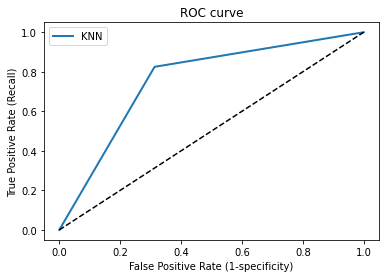

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="KNN") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_knn, tpr_knn)
plt.show()

**RF**

---



In [ ]:
hyperparameter_set = {'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt'],"min_samples_split":[2,3,4,5],"min_samples_leaf":[1,2,3,4]}
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rand_search_random_forest = RandomizedSearchCV(estimator = random_forest, param_distributions = hyperparameter_set, n_iter = 10, cv = 10, scoring = 'accuracy', return_train_score = True)
RF_search = rand_search_random_forest.fit(X_train_feature_scale, y_train_label_30)
RF_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt'}

In [ ]:
new_random_forest = RandomForestClassifier(**RF_search.best_params_)
new_random_forest.fit(X_train_feature_scale, y_train_label_30)


RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=4)

In [ ]:
import pickle
filename = 'RF_model.sav'
pickle.dump(new_random_forest, open(filename, 'wb'))


In [ ]:
import pickle
filename = 'RF_model.sav'
RF_model_load = pickle.load(open(filename, 'rb'))

In [ ]:
y_test_label_pred_RF = RF_model_load.predict(X_test_feature_scale)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
print("RF_Accuracy: ", accuracy_score(y_test_label_30, y_test_label_pred_RF))
print("RF_precision: ", precision_score(y_test_label_30, y_test_label_pred_RF))
print("RF_recall: ", recall_score(y_test_label_30, y_test_label_pred_RF))
print("RF_roc_auc_score: ", roc_auc_score(y_test_label_30, y_test_label_pred_RF))
print("RF_f1_score: ", f1_score(y_test_label_30, y_test_label_pred_RF))

RF_Accuracy:  0.7984293193717278
RF_precision:  0.8263988522238164
RF_recall:  0.8396501457725948
RF_roc_auc_score:  0.7883033337558626
RF_f1_score:  0.8329718004338394


In [ ]:
from sklearn.model_selection import cross_val_predict
test_score_RF = cross_val_predict(RF_model_load, X_test_feature_scale, y_test_label_30, cv=10, method="predict")

In [ ]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_label_30, test_score_RF)

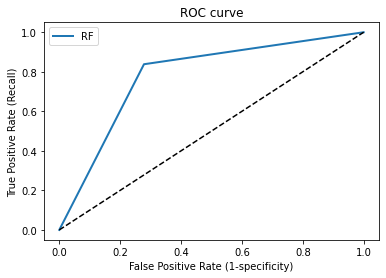

In [ ]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="RF") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_rf, tpr_rf)
plt.show()

**SVC**

---



In [ ]:
from sklearn.svm import SVC
hyperparameter_set = {'C': [0.001, 0.01, 0.1, 1,3,5,10], 'kernel': ['linear',"poly", 'rbf'], 'gamma': ["auto","scale",0.001, 0.01, 0.1, 1]}
svm = SVC()
from sklearn.model_selection import RandomizedSearchCV
rand_search_svc = RandomizedSearchCV(estimator = svm, param_distributions = hyperparameter_set, n_iter = 10, cv = 10, scoring = 'accuracy', return_train_score = True)
SVC_search = rand_search_svc.fit(X_train_feature_scale, y_train_label_30)
SVC_search.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'C': 5}

In [ ]:
new_SVC = SVC(**SVC_search.best_params_)
new_SVC.fit(X_train_feature_scale, y_train_label_30)


SVC(C=5, gamma='auto', kernel='linear')

In [ ]:
import pickle
filename = 'SVC_model.sav'
pickle.dump(new_SVC, open(filename, 'wb'))


In [ ]:
import pickle
filename = 'SVC_model.sav'
SVC_model_load = pickle.load(open(filename, 'rb'))

In [ ]:
y_test_label_pred_SVC = SVC_model_load.predict(X_test_feature_scale)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
print("SVC_Accuracy: ", accuracy_score(y_test_label_30, y_test_label_pred_SVC))
print("SVC_precision: ", precision_score(y_test_label_30, y_test_label_pred_SVC))
print("SVC_recall: ", recall_score(y_test_label_30, y_test_label_pred_SVC))
print("SVC_roc_auc_score: ", roc_auc_score(y_test_label_30, y_test_label_pred_SVC))
print("SVC_f1_score: ", f1_score(y_test_label_30, y_test_label_pred_SVC))

SVC_Accuracy:  0.8010471204188482
SVC_precision:  0.8225352112676056
SVC_recall:  0.8513119533527697
SVC_roc_auc_score:  0.7886994549372544
SVC_f1_score:  0.836676217765043


In [ ]:
from sklearn.model_selection import cross_val_predict
test_score_SVC = cross_val_predict(SVC_model_load, X_test_feature_scale, y_test_label_30, cv=10, method="predict")

In [ ]:
from sklearn.metrics import roc_curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test_label_30, test_score_SVC)

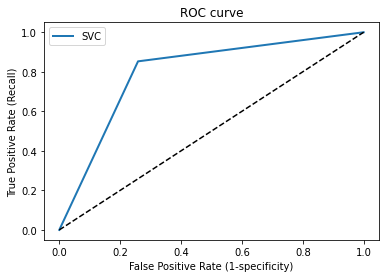

In [ ]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="SVC") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_svc, tpr_svc)
plt.show()

**LogisticRegression**

---



In [ ]:
hyperparameter_set = {'C': [1,0.1,0.01,0.001,0.0001,0]}
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV
rand_search_logistic = RandomizedSearchCV(estimator = logistic_model, param_distributions = hyperparameter_set, n_iter = 10, cv = 10, scoring = 'accuracy', return_train_score = True)
log_search = rand_search_logistic.fit(X_train_feature_scale, y_train_label_30)
log_search.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", li

{'C': 0.1}

In [ ]:
new_log = LogisticRegression(**log_search.best_params_)
new_log.fit(X_train_feature_scale, y_train_label_30)


LogisticRegression(C=0.1)

In [ ]:
import pickle
filename = 'LOG_model.sav'
pickle.dump(new_log, open(filename, 'wb'))


In [ ]:
import pickle
filename = 'LOG_model.sav'
LOG_model_load = pickle.load(open(filename, 'rb'))

In [ ]:
y_test_label_pred_log = LOG_model_load.predict(X_test_feature_scale)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
print("log_Accuracy: ", accuracy_score(y_test_label_30, y_test_label_pred_log))
print("log_precision: ", precision_score(y_test_label_30, y_test_label_pred_log))
print("log_recall: ", recall_score(y_test_label_30, y_test_label_pred_log))
print("log_roc_auc_score: ", roc_auc_score(y_test_label_30, y_test_label_pred_log))
print("log_f1_score: ", f1_score(y_test_label_30, y_test_label_pred_log))

log_Accuracy:  0.8045375218150087
log_precision:  0.8208333333333333
log_recall:  0.8615160349854227
log_roc_auc_score:  0.7905406261883634
log_f1_score:  0.8406827880512091


In [ ]:
from sklearn.model_selection import cross_val_predict
test_score_log = cross_val_predict(LOG_model_load, X_test_feature_scale, y_test_label_30, cv=10, method="predict")

In [ ]:
from sklearn.metrics import roc_curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_label_30, test_score_log)

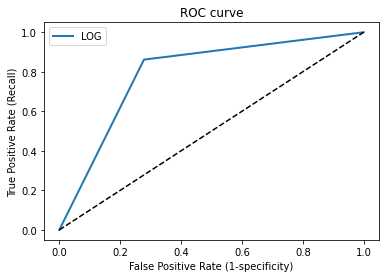

In [ ]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="LOG") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_log, tpr_log)
plt.show()

**VotingClassifier**

---



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(**log_search.best_params_)
clf2 = RandomForestClassifier(**RF_search.best_params_)
clf3 = SVC(**SVC_search.best_params_) 
clf4 = KNeighborsClassifier(n_neighbors=11, metric = "cosine")
eclf = VotingClassifier(estimators=[("lr",clf1),('rf',clf2),('svc',clf3),("knn",clf4)],voting="hard")

for clf, label in zip([clf1, clf2, clf3,clf4, eclf], ['Logistic Regression', 'Random Forest', 'SVC', "KNeighborsClassifier", 'Ensemble']):
  scores = cross_val_score(clf, X_train_feature_scale, y_train_label_30, scoring='accuracy', cv=10)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.03) [Logistic Regression]
Accuracy: 0.78 (+/- 0.02) [Random Forest]
Accuracy: 0.79 (+/- 0.03) [SVC]
Accuracy: 0.75 (+/- 0.02) [KNeighborsClassifier]
Accuracy: 0.78 (+/- 0.02) [Ensemble]


In [ ]:
eclf.fit(X_train_feature_scale, y_train_label_30)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1)),
                             ('rf',
                              RandomForestClassifier(max_features='sqrt',
                                                     min_samples_leaf=3,
                                                     min_samples_split=4)),
                             ('svc', SVC(C=5, gamma='auto', kernel='linear')),
                             ('knn',
                              KNeighborsClassifier(metric='cosine',
                                                   n_neighbors=11))])

In [ ]:
import pickle
filename = 'Ensemble_model.sav'
pickle.dump(eclf, open(filename, 'wb'))
Ensemble_model_load = pickle.load(open(filename, 'rb'))

In [ ]:
import pickle
filename = 'Ensemble_model.sav'
Ensemble_model_load = pickle.load(open(filename, 'rb'))

In [ ]:
y_test_label_pred_ensemble = Ensemble_model_load.predict(X_test_feature_scale)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
print("ensemble_Accuracy: ", accuracy_score(y_test_label_30, y_test_label_pred_ensemble))
print("ensemble_precision: ", precision_score(y_test_label_30, y_test_label_pred_ensemble))
print("ensemble_recall: ", recall_score(y_test_label_30, y_test_label_pred_ensemble))
print("ensemble_roc_auc_score: ", roc_auc_score(y_test_label_30, y_test_label_pred_ensemble))
print("ensemble_f1_score: ", f1_score(y_test_label_30, y_test_label_pred_ensemble))

ensemble_Accuracy:  0.8071553228621291
ensemble_precision:  0.8374455732946299
ensemble_recall:  0.8411078717201166
ensemble_roc_auc_score:  0.7988148054252756
ensemble_f1_score:  0.8392727272727273


In [ ]:
from sklearn.model_selection import cross_val_predict
test_score_Ensemble = cross_val_predict(Ensemble_model_load, X_test_feature_scale, y_test_label_30, cv=10, method="predict")

In [ ]:
from sklearn.metrics import roc_curve
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test_label_30, test_score_Ensemble)

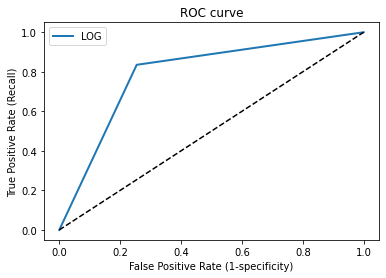

In [ ]:
def plot_roc_curve(fpr, tpr, label=None): 
  plt.plot(fpr, tpr, linewidth=2, label="LOG") 
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
  plt.xlabel("False Positive Rate (1-specificity)")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC curve")
  plt.legend()
  
plot_roc_curve(fpr_ensemble, tpr_ensemble)
plt.show()

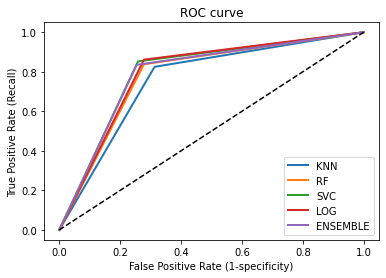

In [ ]:
plt.plot(fpr_knn, tpr_knn, linewidth=2, label="KNN")
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="RF")
plt.plot(fpr_svc, tpr_svc, linewidth=2, label="SVC")
plt.plot(fpr_log, tpr_log, linewidth=2, label="LOG")
plt.plot(fpr_ensemble, tpr_ensemble, linewidth=2, label="ENSEMBLE") 
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC curve")
plt.legend()

**multi-layer neural network**

---



In [ ]:
print(X_train_feature_scale.shape, y_train_label_30.shape)

(2674, 12) (2674,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() # initialize Sequential model
model.add(Dense(100, input_shape=(12,), activation='relu')) # input layer -> hidden layer 1
model.add(Dense(100, activation='relu')) # hidden layer 1 -> hidden layer 2
model.add(Dense(1, activation='sigmoid')) # hidden layer 2 -> output layer
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit(X_train_feature_scale, y_train_label_30,validation_split=0.3, epochs = 100)

Epoch 1/100
59/59 [==============================] - 1s 7ms/step - loss: 0.6673 - accuracy: 0.6237 - val_loss: 0.6339 - val_accuracy: 0.6750
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.6836 - val_loss: 0.5962 - val_accuracy: 0.6887
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7162 - val_loss: 0.5676 - val_accuracy: 0.7235
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7413 - val_loss: 0.5446 - val_accuracy: 0.7435
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7568 - val_loss: 0.5252 - val_accuracy: 0.7547
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7702 - val_loss: 0.5093 - val_accuracy: 0.7733
Epoch 7/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7723 - val_loss: 0.4967 - val_accuracy: 0.7733
Epoch 8/100
5

In [ ]:
print(train_history.history.keys())
print(train_history.history['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.6673192381858826, 0.61863774061203, 0.5859946012496948, 0.5601112246513367, 0.5392341613769531, 0.5219908356666565, 0.50814288854599, 0.4967036843299866, 0.48737430572509766, 0.479750394821167, 0.4736357629299164, 0.4687484800815582, 0.46454375982284546, 0.4612566828727722, 0.45855623483657837, 0.45608553290367126, 0.45414507389068604, 0.45235830545425415, 0.4509943127632141, 0.4496634602546692, 0.44854962825775146, 0.4473743438720703, 0.44642722606658936, 0.4454587697982788, 0.44457119703292847, 0.44391632080078125, 0.44293010234832764, 0.4421983063220978, 0.4416152834892273, 0.440711110830307, 0.4399394094944, 0.4392911493778229, 0.43870702385902405, 0.43779298663139343, 0.4374035894870758, 0.4365502595901489, 0.4360368847846985, 0.4353541135787964, 0.4348103106021881, 0.4341259002685547, 0.4335803687572479, 0.4330255091190338, 0.43256083130836487, 0.43218791484832764, 0.43134328722953796, 0.43092572689056396, 0.430348932

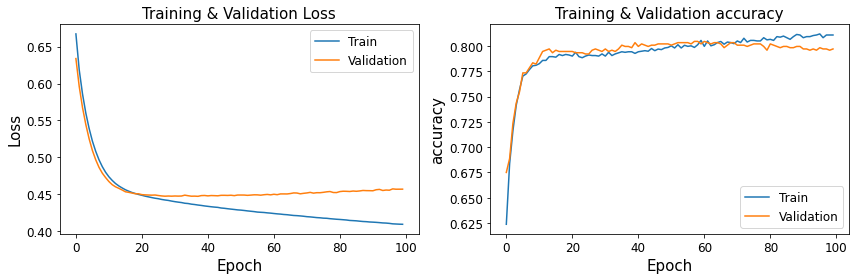

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

**looks like epoch = 100 is too much, change to 20**

---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential() # initialize Sequential model
model2.add(Dense(100, input_shape=(12,), activation='relu')) # input layer -> hidden layer 1
model2.add(Dense(100, activation='relu')) # hidden layer 1 -> hidden layer 2
model2.add(Dense(1, activation='sigmoid')) # hidden layer 2 -> output layer
model2.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_history = model2.fit(X_train_feature_scale, y_train_label_30,validation_split=0.3, epochs = 20)

Epoch 1/20
59/59 [==============================] - 1s 5ms/step - loss: 0.6757 - accuracy: 0.5927 - val_loss: 0.6335 - val_accuracy: 0.6687
Epoch 2/20
59/59 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.6932 - val_loss: 0.5912 - val_accuracy: 0.7136
Epoch 3/20
59/59 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7226 - val_loss: 0.5611 - val_accuracy: 0.7460
Epoch 4/20
59/59 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7493 - val_loss: 0.5375 - val_accuracy: 0.7559
Epoch 5/20
59/59 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.7611 - val_loss: 0.5193 - val_accuracy: 0.7659
Epoch 6/20
59/59 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7702 - val_loss: 0.5046 - val_accuracy: 0.7733
Epoch 7/20
59/59 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7750 - val_loss: 0.4941 - val_accuracy: 0.7746
Epoch 8/20
59/59 [==

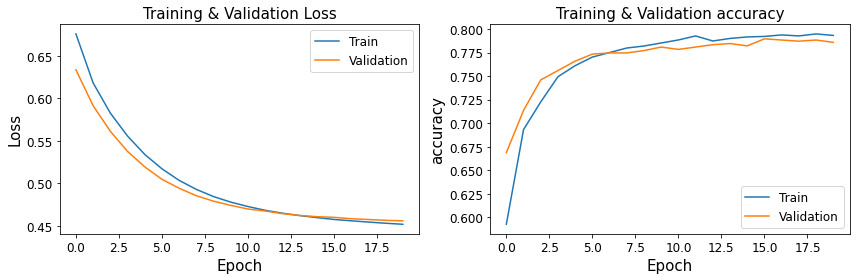

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model2.save("network.h5")
model_loaded = load_model("network.h5")

In [ ]:
model_loaded.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7898


[0.4517131447792053, 0.7898280024528503]

In [ ]:
y_test_label_pred_network_prob = model_loaded.predict(X_test_feature_scale)
print("test_predictions: ",y_test_label_pred_network_prob)

36/36 [==============================] - 0s 1ms/step
test_predictions:  [[0.11870755]
 [0.7468851 ]
 [0.5896439 ]
 ...
 [0.93993044]
 [0.83403337]
 [0.8868749 ]]


In [ ]:
import numpy as np
from sklearn import metrics
y_test_label_pred_network = (y_test_label_pred_network_prob > 0.5).astype("bool")
print("Network_Accuracy: ", metrics.accuracy_score(y_test_label_30, y_test_label_pred_network))

Network_Accuracy:  0.806282722513089


In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.model_selection import train_test_split


def build_model():
  model = Sequential()
  model.add(Dense(100, input_shape=(12,), activation='relu')) # input layer -> hidden layer 1
  model.add(Dense(100, activation='relu')) # hidden layer 1 -> hidden layer 2
  model.add(Dense(1, activation='sigmoid'))
  return model


learning_rate_options = [0.001, 0.01, 0.1]
for learning_rate in learning_rate_options:
  model = build_model()
  optimizer_to_run = SGD(learning_rate=learning_rate)
  model.compile(loss="binary_crossentropy", optimizer=optimizer_to_run, metrics=["accuracy"])
  model.fit(X_train_feature_scale, y_train_label_30, validation_split=0.3, epochs= 20, verbose=None)
  model.save("model_lr"+str(learning_rate)+".h5")
  

In [ ]:
model_loaded_1 = load_model("model_lr0.1.h5")
model_loaded_2 = load_model("model_lr0.01.h5")
model_loaded_3 = load_model("model_lr0.001.h5")

**Base on the result we know model_loaded_1 --> model_lr0.1.h5 have the highest accuracy**

---



In [ ]:
model_loaded_1.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8037


[0.4187648594379425, 0.8036649227142334]

In [ ]:
model_loaded_2.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7913


[0.4475327730178833, 0.7913238406181335]

In [ ]:
model_loaded_3.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.7450


[0.5926709175109863, 0.7449513673782349]

**Base on model_loaded_1 condition apply layer tuning see the acc can improve or not**

---



In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn import metrics


def build_model2(n_layers =2):
  model = Sequential()
  for i in range(n_layers):
    model.add(Dense(100,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))
  return model


layers = [1,2,3,4,5]
for n_layer in layers:
  model = build_model2(n_layer)
  optimizer_to_run = SGD(learning_rate=0.1)
  model.compile(loss="binary_crossentropy", optimizer=optimizer_to_run, metrics=["accuracy"])
  model.fit(X_train_feature_scale, y_train_label_30, validation_split=0.3, epochs= 20, verbose=None)
  model.save("model_lr_"+str(n_layer)+".h5")
  

In [ ]:
from tensorflow.keras.models import load_model
model_loaded_4 = load_model("model_lr_1.h5")
model_loaded_5 = load_model("model_lr_2.h5")
model_loaded_6 = load_model("model_lr_3.h5")
model_loaded_7 = load_model("model_lr_4.h5")
model_loaded_8 = load_model("model_lr_5.h5")


In [ ]:
model_loaded_4.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.7999


[0.42764347791671753, 0.7999252080917358]

In [ ]:
model_loaded_5.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8111


[0.41461697220802307, 0.8111443519592285]

In [ ]:
model_loaded_6.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8175


[0.39690104126930237, 0.8175018429756165]

In [ ]:
model_loaded_7.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8007


[0.42268702387809753, 0.8006731271743774]

In [ ]:
model_loaded_8.evaluate(X_train_feature_scale, y_train_label_30)

84/84 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.7932


[0.4426964819431305, 0.7931936979293823]

**after para tuning model_loaded_6 got the highest acc --> SGD(learning_rate=0.1) & layer = 3**

---



In [ ]:
X_test_feature_scale[0]

array([-1.20176592, -1.15724493, -1.27963218, -1.11532294, -0.25718015,
       -0.34471503,  2.89524716, -0.22696687, -0.57861346,  1.63622696,
       -0.52530444,  1.3519461 ])

In [ ]:
type(X_test_feature_scale[0])

numpy.ndarray

In [ ]:
X_test.head()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
3529,0.0,5.0,3.0,156.000,71.0,0.0,1.0,0.0,0.0,65.00,3.02,0.0,2.0
1633,1.0,6.0,4.0,181.991,80.0,0.0,0.0,0.0,0.0,30.03,1.94,0.0,0.0
2846,0.0,10.0,3.0,156.000,51.0,1.0,0.0,0.0,0.0,28.00,2.77,0.0,0.0
4601,0.0,14.0,4.0,150.114,70.0,0.0,0.0,0.0,0.0,22.50,2.30,0.0,0.0
4044,1.0,4.0,3.0,182.880,125.0,0.0,0.0,0.0,0.0,52.50,2.50,0.0,2.0


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

#Web App

In [54]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 8.4 MB/s 
     |████████████████████████████████| 213 kB 64.2 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 278 kB 64.0 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 106 kB 71.2 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 2.3 MB 48.9 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 68 kB 6.5 M

In [ ]:
X_train_feature.to_csv('X_train_feature', index=False)

In [56]:
from multiprocessing import Value
from tensorflow.keras.models import load_model
import gradio as gr
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

data_df = pd.read_csv('X_train_feature')
standardscaler = StandardScaler().fit(data_df)

title = "Warfarin Dose Prediction"

#Set your inputs and values here
input_modules = [gr.Radio(label = "Gender", choices= ['Male', 'Female']), 
          gr.Dropdown(label = "Race", choices = ["African-American","Asian","Black","Black African","Black or African American","Caucasian","Han Chinese","Hispanic","Intermediate","Japanese","Korean","Other","Other (Black British)","Other Mixed Race","White","other"]),
          gr.Dropdown(label = "Age", choices = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59','60 - 69','70 - 79','80 - 89','90+']),
          gr.Textbox(label = "Height(cm)"),
          gr.Textbox(label = "Weight(kg)"),
          gr.Radio(label = "Diabetes", choices= [0.0, 1.0]),
          gr.Radio(label = "Simvastatin", choices= [0.0, 1.0]),
          gr.Radio(label = "Atorvastatin", choices= [0.0, 1.0]),
          gr.Textbox(label = "Target_INR"),
          gr.Textbox(label = "INR_on_Reported_Therapeutic_Dose_of_Warfarin"),
          gr.Dropdown(label = "Cyp2C9_genotypes", choices = ['*1/*1', '*1/*2', '*1/*3', '*2/*3', '*2/*2','*3/*3','*1/*5','*1/*11','*1/*6', '*1/*13', '*1/*14']),
          gr.Radio(label = "VKORC1_genotype", choices= ['A/A', 'A/G', 'G/G']),
          gr.inputs.Dropdown(label = "Model", choices = ["KNN_model","LOG_model","SVC_model","RF_model","Ensemble_model","Neural_network"])
          ]


output_modules = [gr.Textbox(label = "Patient required dose ≤30mg/wk (low required dose (LRD))")]



def Dose_classifier(inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10,inp11,inp12,inp13):
  #Set the encoding of your string values. Start here
  if inp1 == 'Male':
    inp1_value = float(1)
  else:
    inp1_value = float(0)

  if inp2 == 'African-American':
    inp2_value = float(0)
  elif inp2 == 'Asian':
    inp2_value = float(1)
  elif inp2 == 'Black':
    inp2_value = float(2)
  elif inp2 == 'Black African':
    inp2_value = float(3)
  elif inp2 == 'Black or African American':
    inp2_value = float(4)
  elif inp2 == 'Caucasian':
    inp2_value = float(5)
  elif inp2 == 'Han Chinese':
    inp2_value = float(6)
  elif inp2 == 'Hispanic':
    inp2_value = float(7)
  elif inp2 == 'Intermediate':
    inp2_value = float(8)
  elif inp2 == 'Japanese':
    inp2_value = float(9)
  elif inp2 == 'Korean':
    inp2_value = float(10)
  elif inp2 == 'Other':
    inp2_value = float(11)
  elif inp2 == 'Other (Black British)':
    inp2_value = float(12)
  elif inp2 == 'Other Mixed Race':
    inp2_value = float(13)
  elif inp2 == 'White':
    inp2_value = float(14)
  elif inp2 == 'other':
    inp2_value = float(15)
  
  if inp3 == '10 - 19':
    inp3_value = float(0)
  elif inp3 == '20 - 29':
    inp3_value = float(1)
  elif inp3 == '30 - 39':
    inp3_value = float(2)
  elif inp3 == '40 - 49':
    inp3_value = float(3)
  elif inp3 == '50 - 59':
    inp3_value = float(4)
  elif inp3 == '60 - 69':
    inp3_value = float(5)
  elif inp3 == '70 - 79':
    inp3_value = float(6)
  elif inp3 == '80 - 89':
    inp3_value = float(7)
  else:
    inp3_value = float(8)
  
  if inp11 == '*1/*1':
    inp11_value = float(0)
  elif inp11 == '*1/*2':
    inp11_value = float(4)
  elif inp11 == '*1/*3':
    inp11_value = float(5)
  elif inp11 == '*2/*3':
    inp11_value = float(9)
  elif inp11 == '*2/*2':
    inp11_value = float(8)
  elif inp11 == '*3/*3':
    inp11_value = float(10)
  elif inp11 == '*1/*5':
    inp11_value = float(6)
  elif inp11 == '*1/*11':
    inp11_value = float(1)
  elif inp11 == '*1/*6':
    inp11_value = float(7)
  elif inp11 == '*1/*13':
    inp11_value = float(2)
  else:
    inp11_value = float(3)

  if inp12 == 'A/A':
    inp12_value = float(0)
  elif inp12 == 'A/G':
    inp12_value = float(1)
  else:
    inp12_value = float(2)

  #End here

  dataset = np.array([inp1_value,inp2_value,inp3_value,inp4,inp5,inp6,inp7,inp8,inp9,inp10,inp11_value,inp12_value])

  if inp13 == "KNN_model":
    model = pickle.load(open("KNN_model.sav", 'rb'))
  elif inp13 == "LOG_model":
    model = pickle.load(open("LOG_model.sav", 'rb'))
  elif inp13 == "SVC_model":
    model = pickle.load(open("SVC_model.sav", 'rb'))
  elif inp13 == "RF_model":
    model = pickle.load(open("RF_model.sav", 'rb'))
  elif inp13 == "Neural_network":
    model = load_model("model_lr_3.h5")
  else:
    model = pickle.load(open("Ensemble_model.sav", 'rb'))

  if inp13 != "Neural_network":
    output1 = model.predict(standardscaler.transform([dataset]))
    return output1[0]
  else:
    output_temp = model.predict(standardscaler.transform([dataset]))
    output1 = (output_temp[0][0]>0.5).astype("bool")
    return output1
gr.Interface(fn=Dose_classifier, 
             inputs=input_modules, 
             outputs=output_modules,
             title=title).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:216: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 229ms/step
Keyboard interruption in main thread... closing server.
